# 4. Turning Exploratory Analysis into Action

Exploratory data analysis is a crucial step in the data science workflow, but it isn't the end! Now it's time to learn techniques and considerations you can use to successfully move forward with your projects after you've finished exploring!

# Checking for class imbalance

The 2022 Kaggle Survey captures information about data scientists' backgrounds, preferred technologies, and techniques. It is seen as an accurate view of what is happening in data science based on the volume and profile of responders.

Having looked at the job titles and categorized to align with our salaries DataFrame, you can see the following proportion of job categories in the Kaggle survey:

Job Category	Relative Frequency
Data Science	0.281236
Data Analytics	0.224231
Other	0.214609
Managerial	0.121300
Machine Learning	0.083248
Data Engineering	0.075375
Thinking of the Kaggle survey results as the population, your task is to find out whether the salaries DataFrame is representative by comparing the relative frequency of job categories.

# Instructions:

- Print the relative frequency of the "Job_Category" column from salaries DataFrame.

In [8]:
import pandas as pd
salaries = pd.read_csv("ds_salaries_clean.csv")

In [ ]:
# Print the relative frequency of Job_Category
print(salaries["Job_Category"].value_counts(normalize=True))

Data Science        0.278
Data Engineering    0.273
Data Analytics      0.226
Machine Learning    0.120
Other               0.069
Managerial          0.034
Name: Job_Category, dtype: float64

# Cross-tabulation

Cross-tabulation can help identify how observations occur in combination.

Using the salaries dataset, which has been imported as a pandas DataFrame, you'll perform cross-tabulation on multiple variables, including the use of aggregation, to see the relationship between "Company_Size" and other variables.

pandas has been imported for you as pd.

# Instructions:

- Perform cross-tabulation, setting "Company_Size" as the index, and the columns to classes in "Experience".

In [10]:
# Cross-tabulate Company_Size and Experience
print(pd.crosstab(salaries["Company_Size"], salaries["Experience"]))

Experience    Entry  Executive  Mid  Senior
Company_Size                               
L                29         11   86      72
M                30         12   98     186
S                29          3   29      22


- Cross-tabulate "Job_Category" and classes of "Company_Size" as column names.

In [ ]:
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"]))

In [ ]:
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"],
            values=salaries["Salary_USD"], aggfunc="mean"))

# Extracting features for correlation

In this exercise, you'll work with a version of the salaries dataset containing a new column called "date_of_response".

The dataset has been read in as a pandas DataFrame, with "date_of_response" as a datetime data type.

Your task is to extract datetime attributes from this column and then create a heat map to visualize the correlation coefficients between variables.

Seaborn has been imported for you as sns, pandas as pd, and matplotlib.pyplot as plt.

# Instructions:

- Extract the month from "date_of_response", storing it as a column called "month".
- Create the "weekday" column, containing the weekday that the participants completed the survey.
- Plot a heat map, including the Pearson correlation coefficient scores.

In [ ]:
# Get the month of the response
salaries["month"] = salaries["date_of_response"].dt.month

# Extract the weekday of the response
salaries["weekday"] = salaries["date_of_response"].dt.weekday

# Create a heatmap
sns.heatmap(salaries.corr(), annot=True)
plt.show()

# Calculating salary percentiles

In the video, you saw that the conversion of numeric data into categories sometimes makes it easier to identify patterns.

Your task is to convert the "Salary_USD" column into categories based on its percentiles. First, you need to find the percentiles and store them as variables.

pandas has been imported as pd and the salaries dataset read in as DataFrame called salaries.

# Instructions:

- Find the 25th percentile of "Salary_USD".
- Store the median of "Salary_USD" as salaries_median.
- Get the 75th percentile of salaries.

In [14]:
# Find the 25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)

# Save the median
salaries_median = salaries["Salary_USD"].median()

# Gather the 75th percentile
seventy_fifth = salaries["Salary_USD"].quantile(0.75)
print(twenty_fifth, salaries_median, seventy_fifth)

59893.0 96982.0 143225.0


# Categorizing salaries

Now it's time to make a new category! You'll use the variables twenty_fifth, salaries_median, and seventy_fifth, that you created in the previous exercise, to split salaries into different labels.

The result will be a new column called "salary_level", which you'll incorporate into a visualization to analyze survey respondents' salary and at companies of different sizes.

pandas has been imported as pd, matplotlib.pyplot as plt, seaborn as sns, and the salaries dataset as a pandas DataFrame called salaries.

# Instructions:

- Create salary_labels, a list containing "entry", "mid", "senior", and "exec".

In [15]:
# Create salary labels
salary_labels = ["entry", "mid", "senior", "exec"]

- Finish salary_ranges, adding the 25th percentile, median, 75th percentile, and largest value from "Salary_USD".

In [16]:
# Create salary labels
salary_labels = ["entry", "mid", "senior", "exec"]

# Create the salary ranges list
salary_ranges = [0, salaries['Salary_USD'].quantile(0.25), salaries['Salary_USD'].median(), salaries['Salary_USD'].quantile(0.75), salaries['Salary_USD'].max()]

- Split "Salary_USD" based on the labels and ranges you've created.

In [17]:
# Create salary labels
salary_labels = ["entry", "mid", "senior", "exec"]

# Create the salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries["Salary_USD"].max()]

# Create salary_level
salaries["salary_level"] = pd.cut(salaries['Salary_USD'], bins=salary_ranges, labels=salary_labels)

- Use sns.countplot() to visualize the count of "Company_Size", factoring salary level labels.

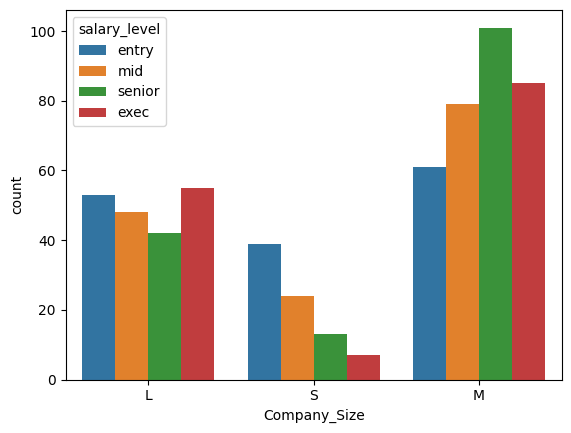

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create salary labels
salary_labels = ["entry", "mid", "senior", "exec"]

# Create the salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries["Salary_USD"].max()]

# Create salary_level
salaries["salary_level"] = pd.cut(salaries["Salary_USD"],
                                  bins=salary_ranges,
                                  labels=salary_labels)

# Plot the count of salary levels at companies of different sizes
sns.countplot(data=salaries, x="Company_Size", hue="salary_level")
plt.show()

# Comparing salaries

Exploratory data analysis is a crucial step in generating hypotheses!

You've had an idea you'd like to explore—do data professionals get paid more in the USA than they do in Great Britain?

You'll need to subset the data by "Employee_Location" and produce a plot displaying the average salary between the two groups.

The salaries DataFrame has been imported as a pandas DataFrame.

pandas has been imported as pd, maplotlib.pyplot as plt and seaborn as sns.

# Instructions:

- Filter salaries where "Employee_Location" is "US" or "GB", saving as usa_and_gb.
- Use usa_and_gb to create a barplot visualizing "Salary_USD" against "Employee_Location".

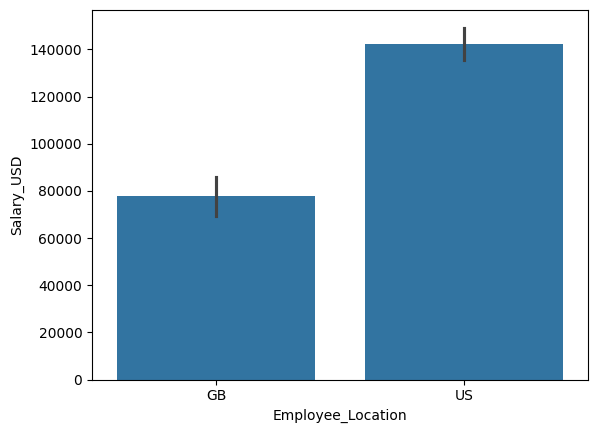

In [21]:
# Filter for employees in the US or GB
usa_and_gb = salaries[salaries['Employee_Location'].isin(['US', 'GB'])]

# Create a barplot of salaries by location
sns.barplot(data=usa_and_gb, x='Employee_Location', y='Salary_USD')
plt.show()

# Choosing a hypothesis

You've seen how visualizations can be used to generate hypotheses, making them a crucial part of exploratory data analysis!

In this exercise, you'll generate a bar plot to inspect how salaries differ based on company size and employment status. For reference, there are four values:

Value	Meaning
CT	Contractor
FL	Freelance
PT	Part-time
FT	Full-time
pandas has been imported as pd, matplotlib.pyplot as plt, seaborn as sns, and the salaries dataset as a pandas DataFrame called salaries.

# Instructions:

- Produce a barplot comparing "Salary_USD" by "Company_Size", factoring "Employment_Status".

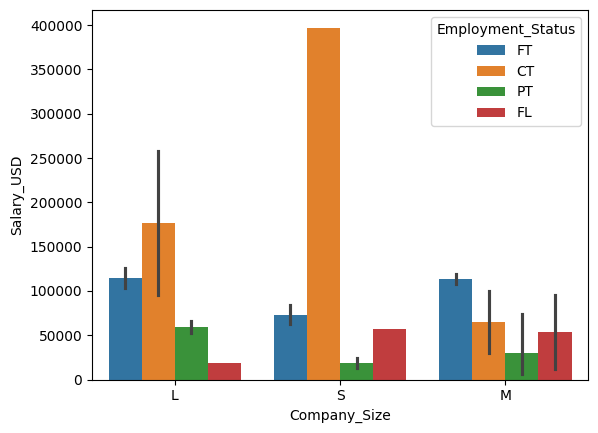

In [22]:
# Create a bar plot of salary versus company size, factoring in employment status
sns.barplot(data=salaries, x="Company_Size", y="Salary_USD", hue="Employment_Status")
plt.show()

# Question

What is a reasonable hypothesis to generate based on this plot?

Possible answers

( ) On average, small companies pay part-time employees less than large companies.

( ) Freelancers earn more at medium-sized companies compared to small or large companies.

(x) On average, large companies pay contractors more than medium-sized companies.

( ) No hypotheses can be generated from this plot.